词袋模型——计算词频
（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

In [1]:
import pandas as pd
import numpy as py
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#导入数据

In [3]:
text_ana = pd.read_csv('text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)

In [4]:
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


In [5]:
#数据预处理

In [6]:
def preprocess_text(text):
    #转换为小写
    text = text.lower()
    #移除URL
    text = re.sub(r'http\S+', '', text)
    return text

In [7]:
#构建词袋模型

In [8]:
#初始化CountVectorizer
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))[:10]

#展示特征矩阵的形状
print('词袋特征矩阵的型庄:', X.shape)

#展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的型庄: (10, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [ ]:
#词频统计

In [9]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [10]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('to', 5),
 ('in', 4),
 ('the', 4),
 ('rt', 3),
 ('of', 2),
 ('qt', 2),
 ('science', 2),
 ('so', 2),
 ('13newsnow', 1),
 ('2016', 1),
 ('22', 1),
 ('41', 1),
 ('achieving', 1),
 ('ago', 1),
 ('airandspace', 1),
 ('all', 1),
 ('already', 1),
 ('american', 1),
 ('an', 1),
 ('appreciate', 1),
 ('are', 1),
 ('article', 1),
 ('at', 1),
 ('baseball', 1),
 ('be', 1),
 ('bill', 1),
 ('birthday', 1),
 ('by', 1),
 ('california', 1),
 ('care', 1),
 ('commission', 1),
 ('contribution', 1),
 ('cutting', 1),
 ('dark', 1),
 ('daylen', 1),
 ('dc', 1),
 ('division', 1),
 ('dream', 1),
 ('drop', 1),
 ('eastern', 1),
 ('election', 1),
 ('elleabella1112', 1),
 ('ends', 1),
 ('ensure', 1),
 ('esva', 1),
 ('event', 1),
 ('finest', 1),
 ('from', 1),
 ('fundraising', 1),
 ('funds', 1),
 ('good', 1),
 ('great', 1),
 ('happy', 1),
 ('has', 1),
 ('health', 1),
 ('help', 1),
 ('heretostay', 1),
 ('higher', 1),
 ('hour', 1),
 ('important', 1),
 ('introduced', 1),
 ('invited', 1),
 ('job', 1),
 ('kylegriffin1', 1)

In [ ]:
#构建词云图

In [11]:
# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

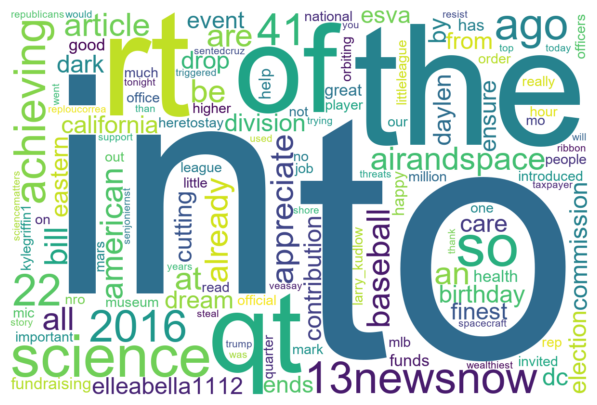

<Figure size 640x480 with 0 Axes>

In [12]:
# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)